# The **Weekly Mean Growth** Analysis.

## Import the package we need.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from PIL import Image

In [11]:
# print(os.getcwd().split("/"))

def get_data_path(data_type) :

    data_path = os.getcwd()

    data_path = data_path.split("/")
    # print(data_path)
    data_path[5] = 'src'
    data_path[6] = 'data'
    data_path.append("")
    data_path[7] = data_type

    temp = ""

    for i in range(0, len(data_path)) :
        temp += data_path[i] + "/"
    
    data_path = temp
    # print(data_path)

    return data_path

In [12]:
data_path = ""
data_type = "weekly_mean"

data_path = get_data_path(data_type)
print(data_path)

os.chdir(data_path)

/Users/linchunho/Developer/ATM-Chem/src/data/weekly_mean//


## $CO_2$

### Load data

First, we read the data and observe the type of the data.

In [13]:
def load_data(data_path, type, skip_rows, data_title) :
    
        for file in os.listdir() :
            if file.startswith(f"{type}") :
                file_path = f"{data_path}/{file}"
                data = pd.read_csv(file_path, skiprows=skip_rows, sep="\s+")
                data = data.replace(-0.99, 0)
                data = data.replace(-999.99, 0)
                data = data.replace(-9.99, 0)
                data = data.replace(-1   , 0)
                data.columns = data_title

        return data

In [14]:
type = "co2"
skip_rows = 48
data_title = ["year", "month", "day", "date", "mol", "days", "one", "ten", "inc"]
co2_weekly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(co2_weekly_mean_data)

      year  month  day       date     mol  days     one     ten     inc
0     1974      5   19  1974.3781  333.37     5    0.00    0.00   50.39
1     1974      5   26  1974.3973  332.95     6    0.00    0.00   50.05
2     1974      6    2  1974.4164  332.35     5    0.00    0.00   49.59
3     1974      6    9  1974.4356  332.20     7    0.00    0.00   49.64
4     1974      6   16  1974.4548  332.37     7    0.00    0.00   50.06
...    ...    ...  ...        ...     ...   ...     ...     ...     ...
2521  2022      9   11  2022.6932  416.05     6  413.07  391.10  139.60
2522  2022      9   18  2022.7123  415.57     7  413.32  391.02  139.27
2523  2022      9   25  2022.7315  415.57     7  413.32  391.07  139.32
2524  2022     10    2  2022.7507  415.26     7  413.52  391.06  138.96
2525  2022     10    9  2022.7699  415.51     7  413.84  391.09  139.05

[2526 rows x 9 columns]


### Plot for the Annaul mean.

After we load the data what we need. Then we plot the relationship between the data. First, we pick up the diversity of season and the average change of the year.

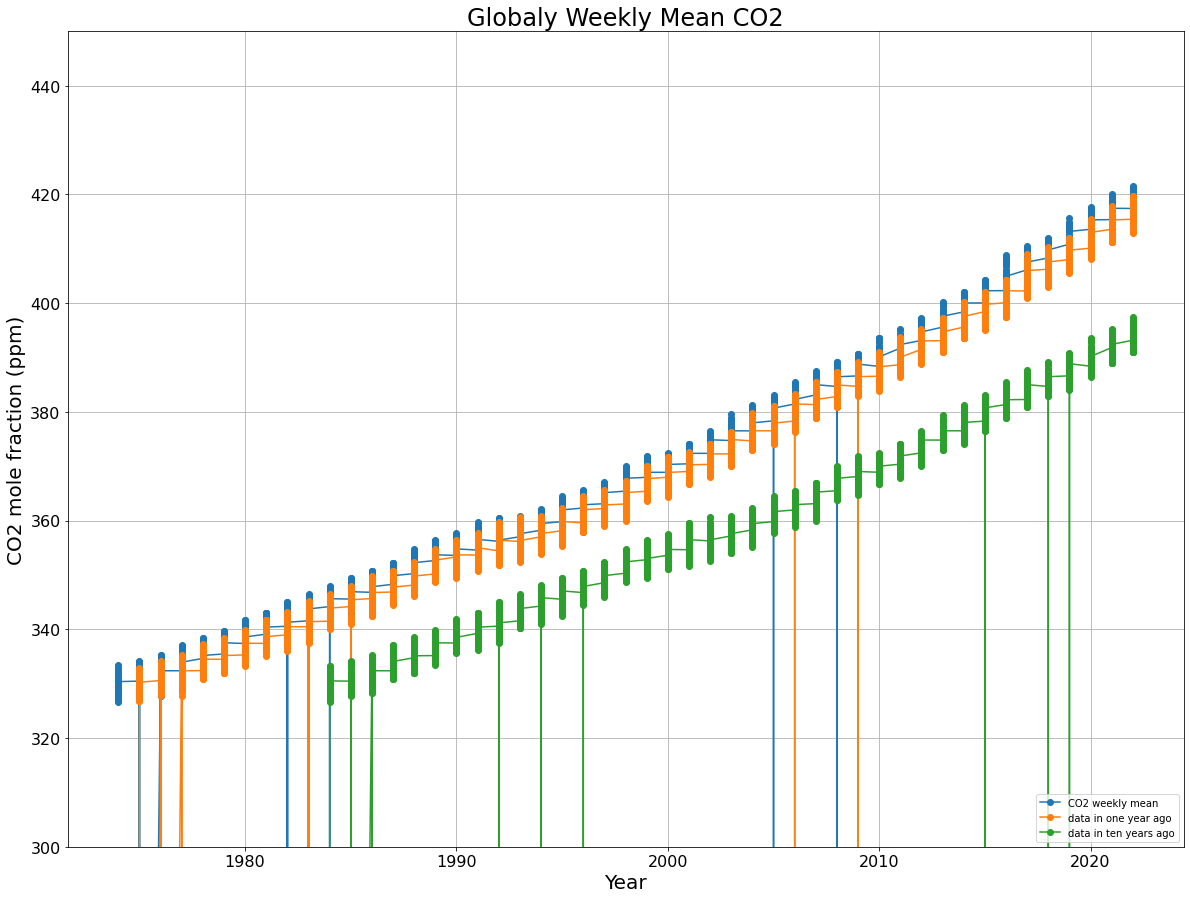

In [15]:
plt.figure(figsize=(20, 15))
plt.plot(co2_weekly_mean_data["year"], co2_weekly_mean_data["mol"], "-o")
plt.plot(co2_weekly_mean_data["year"], co2_weekly_mean_data["one"], "-o")
plt.plot(co2_weekly_mean_data["year"], co2_weekly_mean_data["ten"], "-o")

plt.xlabel("Year", fontsize=20)
plt.ylabel("CO2 mole fraction (ppm)", fontsize=20)
plt.ylim(300, 450)
plt.title("Globaly Weekly Mean CO2", fontsize=24)

# plt.tick_params(axis="both", labelsize=16, color="red")
plt.tick_params(axis="both", labelsize=16)
plt.legend(["CO2 weekly mean", "data in one year ago", "data in ten years ago"], loc ="lower right")

plt.grid()
plt.savefig(f"../../imgs/weekly_mean/co2_weekly_mean.jpg", dpi=300)
plt.show()

## ecent Year

In [16]:
type = "co2"
skip_rows = 2326
data_title = ["year", "month", "day", "date", "mol", "days", "one", "ten", "inc"]
co2_recent_weekly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(co2_recent_weekly_mean_data)

     year  month  day       date     mol  days     one     ten     inc
0    2018      1    7  2018.0164  408.33     6  406.26  384.69  128.13
1    2018      1   14  2018.0356  408.08     7  406.31  386.21  127.69
2    2018      1   21  2018.0548  408.47     6  406.97  386.48  127.91
3    2018      1   28  2018.0740  408.07     7  406.25  386.84  127.38
4    2018      2    4  2018.0932  408.40     7  406.33  386.28  127.60
..    ...    ...  ...        ...     ...   ...     ...     ...     ...
244  2022      9   11  2022.6932  416.05     6  413.07  391.10  139.60
245  2022      9   18  2022.7123  415.57     7  413.32  391.02  139.27
246  2022      9   25  2022.7315  415.57     7  413.32  391.07  139.32
247  2022     10    2  2022.7507  415.26     7  413.52  391.06  138.96
248  2022     10    9  2022.7699  415.51     7  413.84  391.09  139.05

[249 rows x 9 columns]


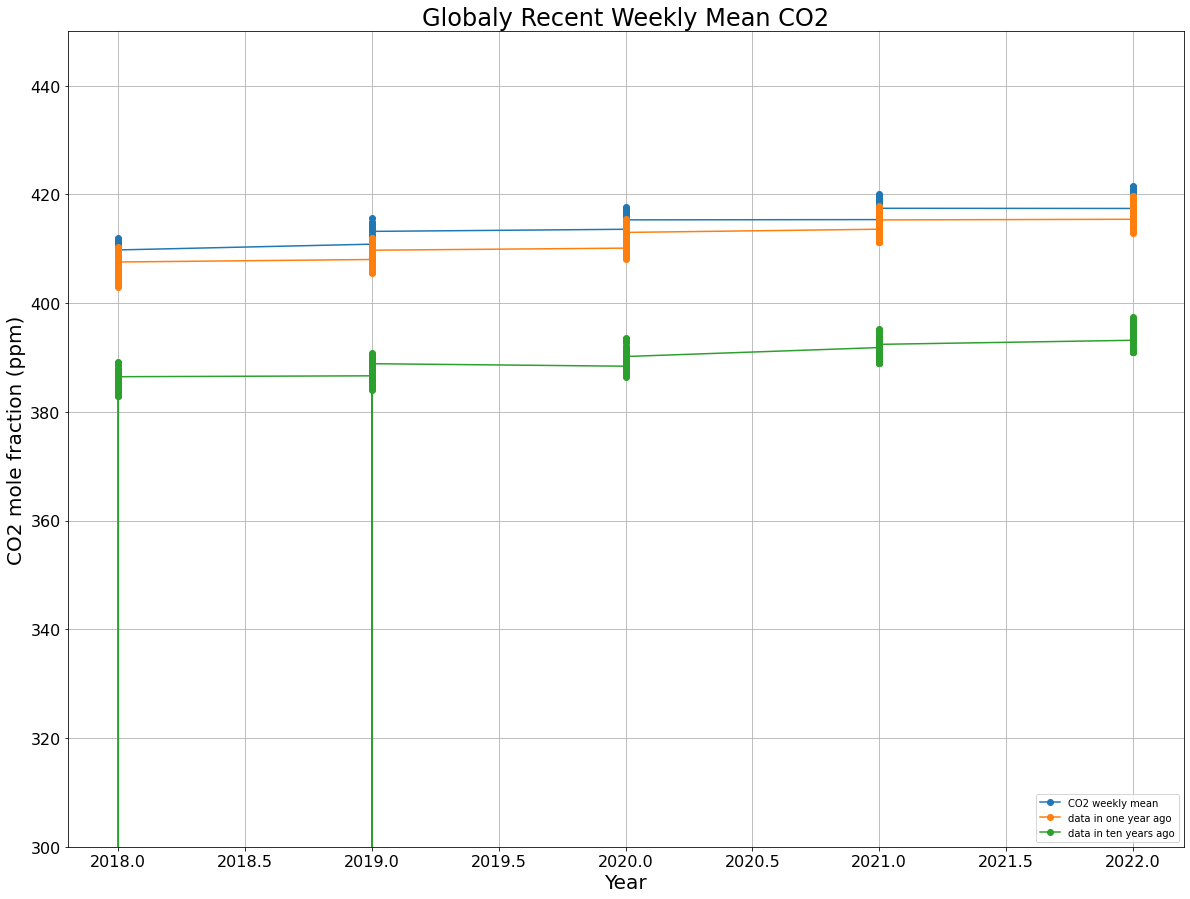

In [17]:
plt.figure(figsize=(20, 15))
plt.plot(co2_recent_weekly_mean_data["year"], co2_recent_weekly_mean_data["mol"], "-o")
plt.plot(co2_recent_weekly_mean_data["year"], co2_recent_weekly_mean_data["one"], "-o")
plt.plot(co2_recent_weekly_mean_data["year"], co2_recent_weekly_mean_data["ten"], "-o")

plt.xlabel("Year", fontsize=20)
plt.ylabel("CO2 mole fraction (ppm)", fontsize=20)
plt.ylim(300, 450)
plt.title("Globaly Recent Weekly Mean CO2", fontsize=24)

# plt.tick_params(axis="both", labelsize=16, color="red")
plt.tick_params(axis="both", labelsize=16)
plt.legend(["CO2 weekly mean", "data in one year ago", "data in ten years ago"], loc ="lower right")

plt.grid()
plt.savefig(f"../../imgs/weekly_mean/co2_recent_weekly_mean.jpg", dpi=300)
plt.show()

## Add my own watermark

![plot](../../src/imgs/1chooo/icon.png)

In [18]:
def add_water_mark(imgs_path, type) :
        os.chdir(imgs_path)

        imgs = glob.glob(f'./*.jpg')
        icon = Image.open('../1chooo/icon.png')
        icon_w, icon_h = icon.size

        for i in imgs:
            name = i.split('/')[::-1][0]   
            img = Image.open(i)    
            img_w, img_h = img.size

            x = int((img_w + icon_w))
            y = int((img_h + icon_h))
            # x = int(img_w - icon_w)
            # y = int(img_h - icon_h)
            img.paste(icon, (750, 550), icon)   
            img.save(f'../watermark/{type}/{name}')

        return

In [19]:
def get_imgs_path(type) :
    
    imgs_path = os.getcwd().split("/")
    temp = ""

    imgs_path[6] = 'imgs'
    imgs_path[7] = type

    for i in range(0, len(imgs_path)) :
        temp += imgs_path[i] + "/"
    
    imgs_path = temp
    
    # print(imgs_path)

    return imgs_path

In [20]:
type = "weekly_mean"

imgs_path = get_imgs_path(type)

os.chdir(imgs_path)

add_water_mark(imgs_path, type)